Dans ce TP, nous allons utiliser 2 modules spécifiques au cours de data mining :

- `statsmodels` pour les modèles linéaires gaussiens et généralisés,
- `sklearn`pour les modèles d'apprentissage.

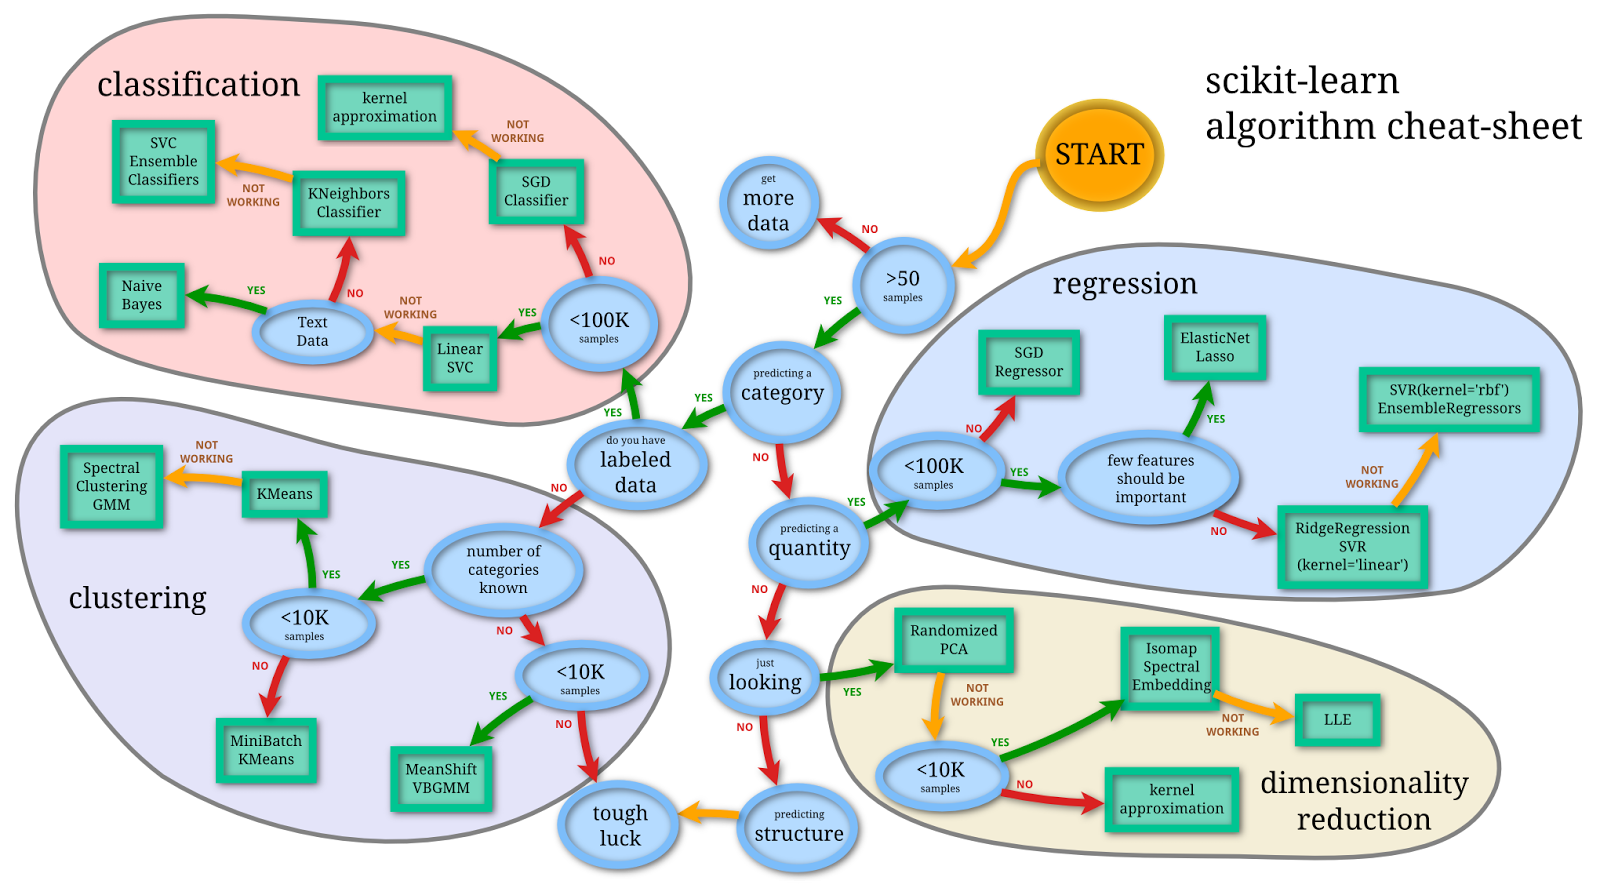

In [44]:
from IPython.display import Image
Image(filename="/home/labatte/Bureau /MASTER DS 1 ADD/CS2- RD4 AFD/sklearn.png",width=700,height=400)

On utilisera aussi les modules `pandas`et `seaborn` pour les manipulations de données statistiques et leurs exploitations graphiques. 

Par convention:
- $X$ représente l'array des données explicatives, 
- $y$ la variable à expliquer, 
- $data$ le data frame panda $[X,y]$, 
- X_train, X_test y_train y_test les échantillons d'appentissage et de test,
- y_pred les valeurs prédites par le modèle

# Exercice 1 : Prise en main de sklearn


On simule deux nuages de points en 3 dimensions. Dans chaque nuage de points, les observations  sont des vecteurs gaussiens de loi:

- nuage 1 : $\mu1=(0,0,0)$ et $\Sigma_1$= $\begin{bmatrix}
3 & 1 & 0.5 \\
1 & 2 & 0.5 \\
0.5 & 0.5 & 1 \\
\end{bmatrix}$

- nuage 2 : $\mu2=(3,3,3)$ et $\Sigma_2=\Sigma_1$.

## Question 1 :
Les instructions suivantes permettent la simulation de ces deux nuages. Interpréter les.


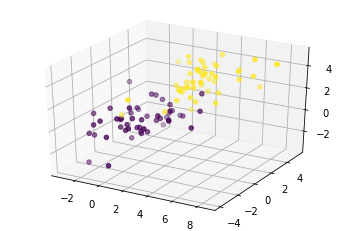

In [40]:
import matplotlib.pyplot as plt #graphique
import numpy as np # calcul matriciel
import pandas as pd # création de data.frame
import numpy.random as npr # stochastique
import scipy.stats as stats # stat
from math import pi,log,sqrt # fonction math
import seaborn as sns # graphiques avancés avec pandas


''' création de 2 nuages gaussiens en 3 dimensions, de mêmes matrices de covariances
 1 : $\mu_1$ = [0,0,0] $\Sigma_1=$[[3,1,0.5],[1,2,0.5],[0.5,0.5,1]]
 2 : $\mu_2$ = [3,3,3] $\Sigma_2=\Sigma_1=$
'''
mu1=np.array([0,0,0]) #moyenne du 1er nuage
mu2=np.array([3,3,3]) #moyenne du 2ème nuage
S=np.array([[3,1,0.5],[1,2,0.5],[0.5,0.5,1]]) #matrice de variance-covariance (égale dans les deux nuages)
A=np.linalg.cholesky(S) #décomposition de cholesky de la matrice de var-cov, S=A*A.T, A matrice triangulaire inférieure
A.dot(A.T) #on retrouve S
X1=npr.randn(50,3).dot(A.T)+mu1;X1 # matrice des coordonnées des points du 1er nuage (simulé), 50 points
g1=np.mean(X1,0);g1 #centre de gravité du 1er nuage (estimation de mu1)
W1=np.cov(X1,rowvar=False);W1 #matrice de variance-covariance du 1er nuage 
X2=npr.randn(50,3).dot(A.T)+mu2 # matrice des coordonnées des points du 2ème nuage(simulé), 50 points
g2=np.mean(X2,0);g2 #centre de gravité du 2ème nuage (estimation de mu2)
W2=np.cov(X2,rowvar=False);W2 #matrice de variance-covariance du 2ème nuage
X=np.concatenate((X1, X2)) # matrice des variables explicatives rassemblant les valeurs des Xi pour les 2 nuages 
y=np.concatenate((np.ones(50),np.ones(50)*2));y # vecteur y à expliquer, contenant les classes d'appartenance des individus
from mpl_toolkits.mplot3d import Axes3D # graphique 3D
fig = plt.figure() #création d'une figure pour afficher le graphique
ax = fig.add_subplot(111, projection='3d') # création des 3 axes du graphique
ax.scatter(X[:,0],X[:,1], X[:,2], c=y) # affichage des points dans le graphique, coloré en fonction de leur classe d'apartenance

## Question 2 :
On réalise maintenant l'analyse discriminante des données. Combien de variables discriminantes peut-on obtenir? Interpréter les commandes suivantes. Déterminer la fonction discriminante.

array([[0.30890161, 0.69300591, 1.86768654]])

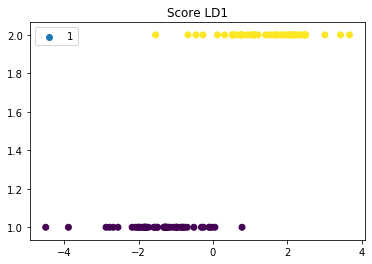

In [41]:
''' AFD et visualisation LD1
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,y) #ajustement du modèle
LD1=lda.transform(X) # création des LD avec le modèle
plt.scatter(LD1,y,c=y) #stripchart
plt.legend(['1','2'])
plt.title('Score LD1')
lda.coef_ # fonction discriminante

## Question 3 :
On évalue maintenant la qualité de prédiction. Interpréter les instructions suivantes

In [44]:
y_pred=lda.predict(X) #vecteur contenant les classes d'appartenance prédite (par AFD) de chaque individu
from sklearn.metrics import confusion_matrix,roc_curve,auc
print(confusion_matrix(y_pred,y)) # Matrice de confusion : 2 individus classés en 2 alors qu'ils sont 1 et 4 classés en 1 alors qu'ils sont 2
lda.score(X,y) #taux de bon classement =(46+48)/100=0.94

[[48  4]
 [ 2 46]]


0.94

 ## Question 4 :
On réalise maintenant l'analyse en composantes principales des données pour une repésentation en 2D. Interpréter les commandes suivantes. 

[2.40243736 0.37157977]


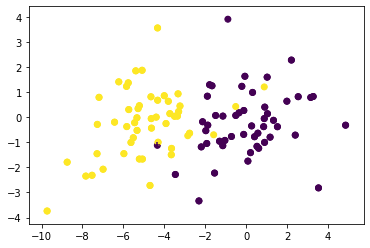

In [45]:
from sklearn.decomposition import PCA # import de la commande pour effectuer la PCA
from sklearn.preprocessing import scale #import d'outils pout standardiser les données
pca = PCA(n_components=2) # on va réaliser une acp en ne gardant que 2 composantes principales 
pca.fit(scale(X)) # réalise l'acp sur X centré et réduit
print(pca.explained_variance_) # part de variance expliquée par chaque axe
PC=pca.transform(X) # applique la réduction de dimension à X
plt.scatter(PC[:,0],PC[:,1],c=y) # affiche les composantes principales dans le plan F1/F2
plt.scatter(PC[y==y_pred,0],PC[y==y_pred,1],c=y[y==y_pred]) #affiche uniquement les individus correctement classés par AFD
plt.scatter(PC[y!=y_pred,0],PC[y!=y_pred,1],c=y[y!=y_pred],marker='+') #affiche les individus mal classés par AFD

## Question 5:
reprendre l'exercice dans les deux cas suivants:
- cas 1 : modifier $\mu_2$,
- cas 1 : les matrices de variance covariance ne sont plus égales,
- cas 2 : 3 groupes au lieu de de deux.

On reprend les questions précédentes mais avec les changement indiqués ci-dessus

### Question 5 : Cas 1

On modifie mu2 : $\mu2=(1,2,3)$
On modifie sigma2 : $\Sigma_2$= $\begin{bmatrix}
2 & 1 & 0.5 \\
1 & 3 & 1.5 \\
0.5 & 1.5 & 4 \\
\end{bmatrix}$

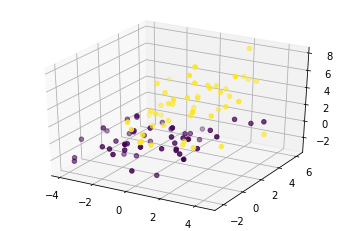

In [46]:
import matplotlib.pyplot as plt #graphique
import numpy as np # calcul matriciel
import pandas as pd # création de data.frame
import numpy.random as npr # stochastique
import scipy.stats as stats # stat
from math import pi,log,sqrt # fonction math
import seaborn as sns # graphiques avancés avec pandas


''' création de 2 nuages gaussiens en 3 dimensions, de matrices de covariances différentes
 1 : $\mu_1$ = [0,0,0] $\Sigma_1=$[[3,1,0.5],[1,2,0.5],[0.5,0.5,1]]
 2 : $\mu_2$ = [1,2,3] $\Sigma_2=$[[2,1,0.5],[1,3,1.5],[0.5,1.5,4]]
'''
mu1_bis=np.array([0,0,0]) #moyenne du 1er nuage
mu2_bis=np.array([1,2,3]) #moyenne du 2ème nuage
S1=np.array([[3,1,0.5],[1,2,0.5],[0.5,0.5,1]]) #sigma 1
S2=np.array([[2,1,0.5],[1,3,1.5],[0.5,1.5,4]]) #sigma 2
A1=np.linalg.cholesky(S1) #décomposition de cholesky de la matrice de var-cov, S=A*A.T, A matrice triangulaire inférieure
A2=np.linalg.cholesky(S2)
X1_bis=npr.randn(50,3).dot(A1.T)+mu1_bis # matrice des coordonnées des points du 1er nuage (simulé), 50 points
g1_bis=np.mean(X1_bis,0) #centre de gravité du 1er nuage (estimation de mu1)
W1_bis=np.cov(X1_bis,rowvar=False) #matrice de variance-covariance du 1er nuage 
X2_bis=npr.randn(50,3).dot(A2.T)+mu2_bis # matrice des coordonnées des points du 2ème nuage(simulé), 50 points
g2_bis=np.mean(X2_bis,0) #centre de gravité du 2ème nuage (estimation de mu2)
W2_bis=np.cov(X2_bis,rowvar=False) #matrice de variance-covariance du 2ème nuage
X_bis=np.concatenate((X1_bis, X2_bis)) # matrice des variables explicatives rassemblant les valeurs des Xi pour les 2 nuages 
y=np.concatenate((np.ones(50),np.ones(50)*2));y # vecteur y à expliquer, contenant les classes d'appartenance des individus
from mpl_toolkits.mplot3d import Axes3D # graphique 3D
fig = plt.figure() #création d'une figure pour afficher le graphique
ax = fig.add_subplot(111, projection='3d') # création des 3 axes du graphique
ax.scatter(X_bis[:,0],X_bis[:,1], X_bis[:,2], c=y) # affichage des points dans le graphique, coloré en fonction de leur classe d'apartenance

array([[-0.00814065,  0.22449303,  0.96049258]])

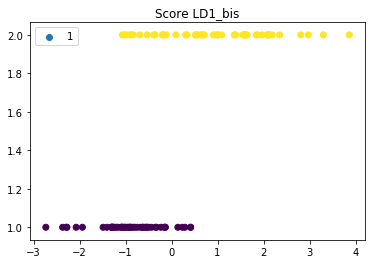

In [47]:
''' AFD et visualisation LD1
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda2 = LinearDiscriminantAnalysis()
lda2.fit(X_bis,y) #ajustement du modèle
LD1_bis=lda2.transform(X_bis) # création des LD avec le modèle
plt.scatter(LD1_bis,y,c=y) #stripchart
plt.legend(['1','2'])
plt.title('Score LD1_bis')
lda2.coef_ # fonction discriminante

In [48]:
y_pred2=lda2.predict(X_bis) #vecteur contenant les classes d'appartenance prédite (par AFD) de chaque individu
from sklearn.metrics import confusion_matrix,roc_curve,auc
print(confusion_matrix(y_pred2,y)) # Matrice de confusion : 5 individus classés en 2 alors qu'ils sont 1 et 14 classés en 1 alors qu'ils sont 2
lda2.score(X_bis,y) #taux de bon classement =(45+36)/100=0.81

[[45 14]
 [ 5 36]]


0.81

[2.03767295 0.66274203]


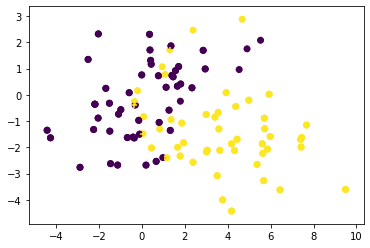

In [49]:
from sklearn.decomposition import PCA # import de la commande pour effectuer la PCA
from sklearn.preprocessing import scale #import d'outils pout standardiser les données
pca2 = PCA(n_components=2) # on va réaliser une acp en ne gardant que 2 composantes principales 
pca2.fit(scale(X_bis)) # réalise l'acp sur X_bis centré et réduit
print(pca2.explained_variance_) # part de variance expliquée par chaque axe
PC2=pca2.transform(X_bis) # applique la réduction de dimension à X_bis
plt.scatter(PC2[:,0],PC2[:,1],c=y) # affiche les composantes principales dans le plan F1/F2
plt.scatter(PC2[y==y_pred2,0],PC2[y==y_pred2,1],c=y[y==y_pred2]) #affiche uniquement les individus correctement classés par AFD
plt.scatter(PC2[y!=y_pred2,0],PC2[y!=y_pred2,1],c=y[y!=y_pred2],marker='+') #affiche les individus mal classés par AFD

### Question 5 : Cas 2

On a maintenant 3 groupes : 
- nuage 1 : $\mu1=(0,0,0)$ et $\Sigma_1$= $\begin{bmatrix}
3 & 1 & 0.5 \\
1 & 2 & 0.5 \\
0.5 & 0.5 & 1 \\
\end{bmatrix}$

- nuage 2 : $\mu2=(3,3,3)$ et $\Sigma_2=\Sigma_1$.
- nuage 3 : $\mu3=(1,2,3)$ et $\Sigma_3=\Sigma_1$

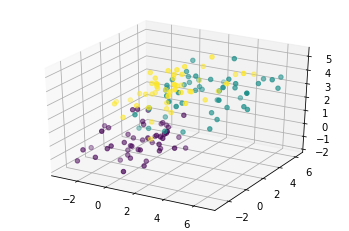

In [66]:
import matplotlib.pyplot as plt #graphique
import numpy as np # calcul matriciel
import pandas as pd # création de data.frame
import numpy.random as npr # stochastique
import scipy.stats as stats # stat
from math import pi,log,sqrt # fonction math
import seaborn as sns # graphiques avancés avec pandas


''' création de 3 nuages gaussiens en 3 dimensions, de mêmes matrices de covariances
 1 : $\mu_1$ = [0,0,0] $\Sigma_1=$[[3,1,0.5],[1,2,0.5],[0.5,0.5,1]]
 2 : $\mu_2$ = [3,3,3] $\Sigma_2=\Sigma_1$
 3 : $\mu_3$ = [1,2,3] $\Sigma_3=\Sigma_1$
'''
mu_1=np.array([0,0,0]) #moyenne du 1er nuage
mu_2=np.array([3,3,3]) #moyenne du 2ème nuage
mu_3=np.array([1,2,3]) #moyenne du 3ème nuage
S_3=np.array([[3,1,0.5],[1,2,0.5],[0.5,0.5,1]]) #matrice de variance-covariance (égale dans les trois nuages)
A_3=np.linalg.cholesky(S) #décomposition de cholesky de la matrice de var-cov, S=A*A.T, A matrice triangulaire inférieure
X1_ter=npr.randn(50,3).dot(A_3.T)+mu_1 # matrice des coordonnées des points du 1er nuage (simulé), 50 points
g1_ter=np.mean(X1_ter,0) #centre de gravité du 1er nuage (estimation de mu1)
W1_ter=np.cov(X1_ter,rowvar=False) #matrice de variance-covariance du 1er nuage 
X2_ter=npr.randn(50,3).dot(A_3.T)+mu_2 # matrice des coordonnées des points du 2ème nuage(simulé), 50 points
g2_ter=np.mean(X2_ter,0) #centre de gravité du 2ème nuage (estimation de mu2)
W2_ter=np.cov(X2_ter,rowvar=False) #matrice de variance-covariance du 2ème nuage
X3=npr.randn(50,3).dot(A_3.T)+mu_3
g3=np.mean(X3,0)
W3=np.cov(X3,rowvar=False)
X_ter=np.concatenate((X1_ter, X2_ter, X3)) # matrice des variables explicatives rassemblant les valeurs des Xi pour les 2 nuages 
y_ter=np.concatenate((np.ones(50),np.ones(50)*2, np.ones(50)*3)) # vecteur y à expliquer, contenant les classes d'appartenance des individus
from mpl_toolkits.mplot3d import Axes3D # graphique 3D
fig = plt.figure() #création d'une figure pour afficher le graphique
ax = fig.add_subplot(111, projection='3d') # création des 3 axes du graphique
ax.scatter(X_ter[:,0],X_ter[:,1], X_ter[:,2], c=y) # affichage des points dans le graphique, coloré en fonction de leur classe d'apartenance

Text(0.5, 1.0, 'Score LD1_ter')

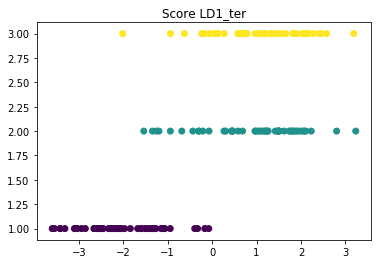

In [67]:
''' AFD et visualisation LD1,LD2
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda3 = LinearDiscriminantAnalysis()
lda3.fit(X_ter,y_ter) #ajustement du modèle
LD1_ter = lda3.transform(X_ter)[:,0] # création des LD avec le modèle
LD2 = lda3.transform(X_ter)[:,1]
plt.scatter(LD1_ter,y_ter,c=y_ter) #stripchart
plt.title('Score LD1_ter')

array([[ 0.10840533, -0.38286409, -1.83129843],
       [ 0.34355983,  0.18833645,  0.61000964],
       [-0.45196517,  0.19452763,  1.22128879]])

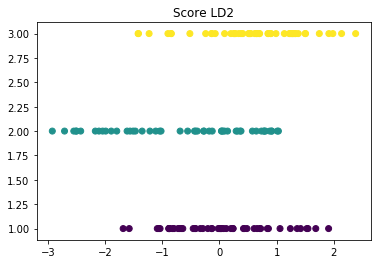

In [68]:
plt.scatter(LD2,y_ter,c=y_ter)
plt.title('Score LD2')
lda3.coef_ # fonction discriminante

Text(0.5, 1.0, 'Représentation des individus dans le plan LD1_ter/LD2')

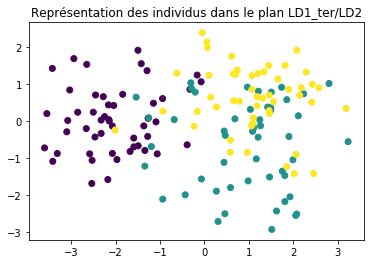

In [69]:
plt.scatter(LD1_ter,LD2,c=y_ter)
plt.title('Représentation des individus dans le plan LD1_ter/LD2')

In [70]:
y_pred3=lda3.predict(X_ter) #vecteur contenant les classes d'appartenance prédite (par AFD) de chaque individu
from sklearn.metrics import confusion_matrix,roc_curve,auc
print(confusion_matrix(y_pred3,y_ter))
lda3.score(X_ter,y_ter) #taux de bon classement =(46+28+38)/150=0.7467

[[46  5  2]
 [ 1 28 10]
 [ 3 17 38]]


0.7466666666666667

[2.17941827 0.55398563]


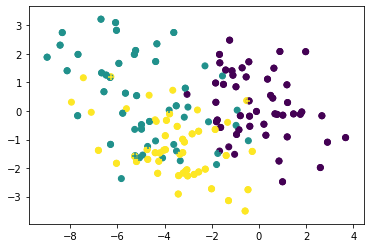

In [71]:
from sklearn.decomposition import PCA # import de la commande pour effectuer la PCA
from sklearn.preprocessing import scale #import d'outils pout standardiser les données
pca3 = PCA(n_components=2) # on va réaliser une acp en ne gardant que 2 composantes principales 
pca3.fit(scale(X_ter)) # réalise l'acp sur X_ter centré et réduit
print(pca3.explained_variance_) # part de variance expliquée par chaque axe
PC3=pca3.transform(X_ter) # applique la réduction de dimension à X_ter
plt.scatter(PC3[:,0],PC3[:,1],c=y_ter) # affiche les composantes principales dans le plan F1/F2
plt.scatter(PC3[y==y_pred3,0],PC3[y==y_pred3,1],c=y[y==y_pred3]) #affiche uniquement les individus correctement classés par AFD
plt.scatter(PC3[y!=y_pred3,0],PC3[y!=y_pred3,1],c=y[y!=y_pred3],marker='+') #affiche les individus mal classés par AFD

# Exercice 2 : un exemple concret : wine.

L'exemple wine décrit à l'aide de 13 variables quantitatives 3 classes de vins. Utiliser `wine['DESCR']` pour les légendes. 

## Question 1 : Données
Interpréter les instructions suivantes. Déterminer la variable initiale discriminant le plus les classes et représenter là.


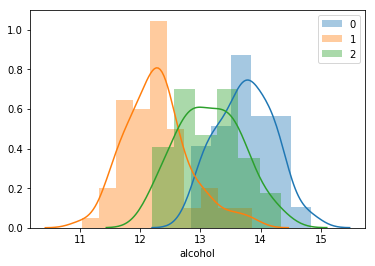

In [45]:
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.random as npr
import scipy.stats as stats
from math import pi,log,sqrt
import seaborn as sns
from sklearn import datasets
wine = datasets.load_wine()
# print(wine['DESCR'])
X=wine.data
y=wine.target
#création d'un data frame pour les graphiques et statsmodels
data = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data['target']=pd.Categorical(wine['target']) #transformation en facteur
#data.describe()
#wine['feature_names']
L='alcohol' #L = variable étudiée
for i in data.target.unique():
    F,p=stats.f_oneway(data[L][data.target==0],data[L][data.target==1],\
    data[L][data.target==2])
    sns.distplot(data[L][data.target==i],
                 kde=1,label='{}'.format(i))
plt.legend()
plt.title('Variable {}, F={}'.format(L,round(F)))

## Question 2 : ANOVA
Interpréter les résultats obtenus pour l'anova.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
lm=ols('alcohol~ C(target)',data=data).fit()
lm.summary()
sm.stats.anova_lm(lm, typ=2)
lm.diagn
stats.shapiro(lm.resid)
stats.levene(lm.resid,data['target']) # équivalent bartlett
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['alcohol'], data['target'])
mc_lm = mc.tukeyhsd()
print(mc_lm)

## Question 3 : Echantillon d'apprentissage

A l'aide de la fonction `train_test_split`, construire un échantillon d'apprentissage et un échantillon de test en proportion (0.75,0.25) en respectant les proportions des classes.


In [ ]:
from sklearn.model_selection import train_test_split
?train_test_split

## Question 4 : Modèle lda, analyse discriminante linéaire

Construire le modèle lda et calculer sa matrice de confusion et son score sur l'échantillon d'apprentissage et de test.


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

## Question 5 : Modèle knn, plus proches voisins
Estimer le modèle knn et déterminer la valeur du nombre de voisin optimisant la prévision sur l'échantillon test. On étudiera le scrore de la méthode en fonction de différentes valeurs de k, 2 à 12 par exemple pour sélectionner le meilleur choix. En déduire les performances du modèle.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Question 6 : Modèle tree, arbre décisionnel

Utiliser un arbre de décision pour réaliser la prédiction.
Pour obtenir un graphique de l'arbre, il faut taper 

`dot -Tpdf wine.dot -o wine.pdf`

dans un terminal et dans le répertoire de wine.dot. 
Evaluer les performances du modèle.


Que fait arbre2? Quel modèle choisir?

In [ ]:
from sklearn import tree
arbre = tree.DecisionTreeClassifier()
arbre.fit(data_train,label_train)
with open("wine.dot", 'w') as f:
    f = tree.export_graphviz(arbre, out_file=f)
arbre2=tree.DecisionTree(max_depth=2)


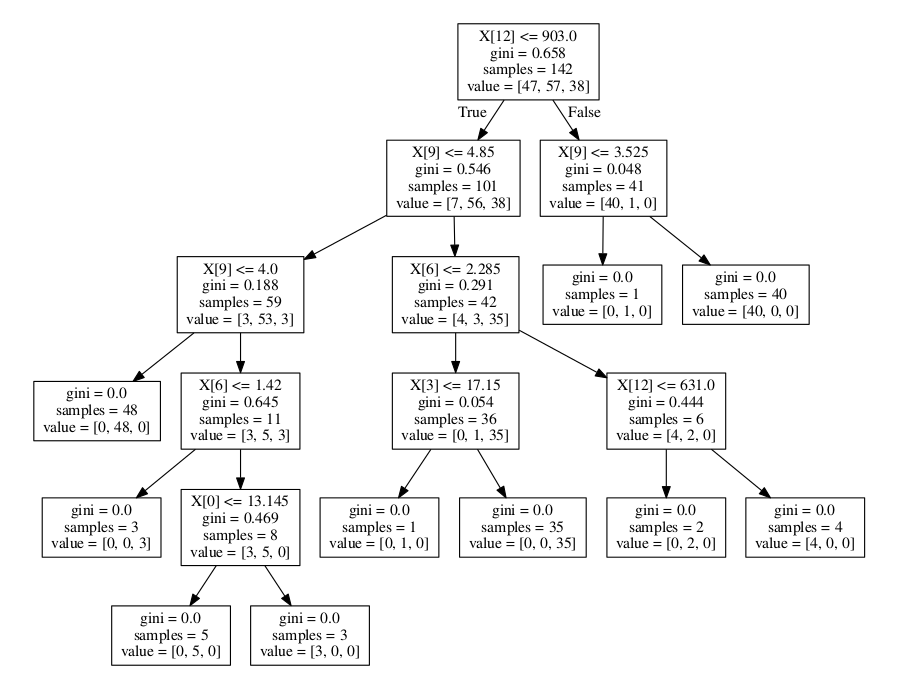

In [47]:
from IPython.display import Image
Image(filename="/home/labatte/Bureau /MASTER DS 1 ADD/CS2- RD4 AFD/wine.png",width=700,height=400)

## Question 7 : modèle gnb, Naive Bayes
Le modèle repose sur l'hypothèse d'indépendance des variables explicatives, simplifiant fortement le modèle et son estimation. Les modèles les plus classiques sont les modèles gaussiens et multinomiaux.
Construire le modèle et l'évaluer.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Exercice 3 : Régression logistique
The datasets, `pima.txt` consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. L'objectif est de prédire / expliquer l’occurrence du diabète (variable à prédire) à partir des caractéristiques des personnes (âge, IMC, etc.) 
http://www.stat.nthu.edu.tw/~swcheng/Teaching/stat5230/data/pima.txt
http://www.grappa.univ-lille3.fr/~torre/Recherche/Experiments/Datasets/
https://eric.univ-lyon2.fr/~ricco/cours/slides/PJ%20-%20machine%20learning%20avec%20scikit-learn.pdf

In [ ]:
pima= pd.read_table("/home/labatte/Bureau /MASTER DS 1 ADD/CS2- RD4 AFD/pima.txt",sep="\t",header=0)
print(pima.columns)
print(pima.dtypes)
#le format pandas est utilie pour statsmodels ou les graphiques
#pour sklearn il faut un format array
data = pima.as_matrix()
X=data[:,0:8]
y=data[:,8]


## Question 1 : régression logistique explicative
Interpréter les résultats ci-dessous. L'étude peut être complétée par une étude descriptive variable par variable.

In [ ]:
import statsmodels.formula.api as sm
glm = sm.Logit(y,X)
result = glm.fit()
result.summary()

## Question 2 : Sélection de variables
On procède à la sélection des variables pertinentes. Quelles sont les variables retenues? Expliquer le principe de sélection. Comparer les résultats avec le modèle complet (X) et optimisé (Xs).

In [ ]:
from sklearn.linear_model import LogisticRegression
Ir= LogisticRegression()
from sklearn.feature_selection import RFE
selecteur = RFE(estimator=Ir)
sol = selecteur.fit(X,y)
print(sol.n_features_)
print(sol.support_)
print(sol.ranking_)
Xs=X[:,sol.support_]

## Question 3 : Qualité du modèle

Calculer la matrice de confusion sur l'échantillon d'apprentissage et de test avec le modèle complet et simplifié. Calculer les taux d'erreurs. 

## Question 4 : Courbe ROC
On construit au préalable un score en fonction duquel les FP et FN sont calculés. Ici on utilise $P(1|X)$. Construire les courbes ROC des deux  modèles et comparer les résultats. 

In [ ]:
#Construction d'un score, P(1|x)
score = glm.predict_proba(X_test)[:,1]


#Courbe ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
glm_roc_auc = roc_auc_score(y_test, glm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test-1, score)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % glm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
